In [26]:
library(RColorBrewer)

In [27]:
ScatterHistC = function(frame, xvar, yvar, zvar, cvar, title, ...,
                        alpha = 0.5,
                        annot_size=3,
                        colorPalette="Dark2",
                        adjust_x = 1,
                        adjust_y = 1) {
#   if(is.null(colorPalette)) {
#     colorPalette = "Dark2"
#   }
  if((!requireNamespace("grid", quietly = TRUE)) ||
     (!requireNamespace("gridExtra", quietly = TRUE))) {
    return("WVPlots::ScatterHistC requires the grid and gridExtra packages be installed")
  }
  frame <- as.data.frame(frame)
  minimal_labels = TRUE

  # Use this plot to print the legend.
  if(is.factor(frame[[zvar]])) {
    labs = levels(frame[[zvar]])
    labs = factor(labs,
                  levels=labs,
                  labels=paste(" ", labs, sep='')  # add a blank to the front
    )
    # this preserves the factor order, if it's not alphabetical
  } else {
    # if frame[[cvar]] isn't a factor, then it will sort alphabetical anyway
    labs = levels(as.factor(frame[[zvar]]))
    labs = paste(" ", labs, sep='')  # add a blank to the front
  }
  nlab = length(labs)

  legendframe = data.frame(x=0, y=seq_len(nlab), zvar=labs)
  emptyframe = data.frame(x=c(-0.01,1), y=c(0,nlab+2))

  legendplt =  ggplot2::ggplot() +
    ggplot2::annotate("text", x=0.1, y=nlab+1, label=zvar, size=annot_size) +
    ggplot2::geom_point(data=legendframe, ggplot2::aes(x=x,y=y,color=zvar),
                        size=3) +
    ggplot2::geom_text(data=legendframe, ggplot2::aes(x=x,y=y,label=zvar),
                       nudge_x=0.025, hjust="left", size=annot_size) +
    ggplot2::geom_point(data=emptyframe, ggplot2::aes(x=x,y=y),
                        colour = "white") +
    ggplot2::theme(plot.background = ggplot2::element_blank(),
                   panel.grid.major = ggplot2::element_blank(),
                   panel.grid.minor = ggplot2::element_blank(),
                   panel.border = ggplot2::element_blank(),
                   panel.background = ggplot2::element_blank(),
                   axis.title.x = ggplot2::element_blank(),
                   axis.title.y = ggplot2::element_blank(),
                   axis.text.x = ggplot2::element_blank(),
                   axis.text.y = ggplot2::element_blank(),
                   axis.ticks = ggplot2::element_blank(),
                   plot.margin = grid::unit(c(1, 1, 0, 0), "lines"),
                   legend.position="none") +
    ggplot2:: scale_color_manual(values=colorPalette)


  # scatterplot of x and y
  plot_center = ggplot2::ggplot(frame,
                                ggplot2::aes_string(x=xvar,y=yvar,color=cvar)) +
    ggplot2::geom_point(alpha=alpha) +
    ggplot2::theme(plot.margin = grid::unit(c(0, 0, 0, 0), "lines")) +
    ggplot2::scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral"))) +
    ggplot2::scale_fill_gradientn(colors = rev(brewer.pal(9,"Spectral"))) + ggplot2::theme_classic()

  # get the data range, to help align plots
  x = frame[[xvar]]
  y = frame[[yvar]]
  xlims =  c(min(x), max(x))
  ylims =  c(min(y), max(y))

  #  print(xlims)
  # print(ggplot_build(plot_center)$panel$ranges[[1]]$x.range)

  plot_center = plot_center +
    ggplot2::coord_cartesian(xlim=xlims) +
    ggplot2::scale_x_continuous(expand = c(0,0)) +
    ggplot2::theme(legend.position="none", axis.text.x = ggplot2::element_text(size = 18),
                   axis.text.y = ggplot2::element_text(size = 18))

  # print(ggplot_build(plot_center)$panel$ranges[[1]]$x.range)

  # marginal density of x - plot on top
  #
  # 0,0,0,0 -- title squooshed down
  # 1,0,0,0 -- title has space
  # 0,1,0,0 -- right side is shorter
  # 0,0,1,0 -- bottom gap bigger
  # 0,0,0,1 -- left side is shorter
  #
  plot_top <- ggplot2::ggplot(frame,
                              ggplot2::aes_string(x=xvar,color=zvar,fill=zvar)) +
    ggplot2::geom_line(stat='density',adjust=adjust_x, size=1) + 
#     ggplot2::geom_density() +
    ggplot2::coord_cartesian(xlim=xlims) +
    ggplot2::scale_x_continuous(expand = c(0,0))+ ggplot2::theme_classic()
  if(minimal_labels) {
    plot_top = plot_top +
      ggplot2::theme(legend.position = "none",
                     axis.title.x = ggplot2::element_blank(),
                     axis.text.x = ggplot2::element_blank(),
                     axis.ticks.x = ggplot2::element_blank(),
                     plot.margin = grid::unit(c(1, 0, 0, 0), "lines"))
  } else {
    plot_top = plot_top +
      ggplot2::theme(plot.margin = grid::unit(c(1, 0, 0, 0), "lines"))
  }
  plot_top <- plot_top + ggplot2::scale_color_manual(values=colorPalette) +
    ggplot2::scale_fill_manual(values=colorPalette)


  # marginal density of y - plot on the right
  plot_right <- ggplot2::ggplot(frame,
                                ggplot2::aes_string(x=yvar,color=zvar,fill=zvar)) +
    ggplot2::geom_line(stat='density', adjust=adjust_y,size=1) +
#     ggplot2::geom_density() +
    #  ggplot2::coord_cartesian(xlim=ylims) + # causes a warning with ggplot2 2.2.1.9000
    ggplot2::scale_x_continuous(expand = c(0,0)) +
    ggplot2::coord_flip(xlim=ylims, expand=0) + ggplot2::theme_classic()
  if(minimal_labels) {
    plot_right = plot_right +
      ggplot2::theme(legend.position = "none",
                     axis.title.y = ggplot2::element_blank(),
                     axis.text.y = ggplot2::element_blank(),
                     axis.ticks.y = ggplot2::element_blank(),
                     plot.margin = grid::unit(c(0, 1, 0, 0), "lines"))
  } else {
    plot_right = plot_right +
      ggplot2::theme(plot.margin = grid::unit(c(0, 1, 0, 0), "lines"))
  }
  plot_right <- plot_right + ggplot2::scale_color_manual(values=colorPalette) +
    ggplot2::scale_fill_manual(values=colorPalette)

#   # esimate size
#   yPadFn <- designYLabelPadFunction(plot_center +
#                                       ggplot2::scale_y_continuous(limits=ylims, expand = c(0,0)),
#                                     plot_top)
#   # adjust using estimte
#   plot_center <- plot_center +
#     ggplot2::scale_y_continuous(limits=ylims, label=yPadFn, expand = c(0,0))
#   plot_top <- plot_top +
#     ggplot2::scale_y_continuous(label=yPadFn)

  # arrange the plots together, with appropriate height and width
  # for each row and column

  gridExtra::grid.arrange(plot_top, legendplt, plot_center, plot_right,
                          top=grid::textGrob(title),
                          ncol = 2, nrow = 2, widths = c(4,1), heights = c(1, 4))
}


In [28]:
ScatterHistN = function(frame, xvar, yvar, zvar, cvar, title, ...,
                        alpha = 0.5,
                        annot_size=3,
                        colorPalette="RdYlBu",
                        nclus=3,
                        adjust_x = 1,
                        adjust_y = 1) {
  frame <- as.data.frame(frame)
  q <- sort(unique(quantile(frame[[zvar]],seq(0, 1, 1/nclus))))
  yC <- cut(frame[[zvar]],q,include.lowest=TRUE)
  if(length(unique(yC))<=1) {
    q <- sort(unique(c(q,median(unique(frame[[zvar]])))))
    yC <- cut(frame[[zvar]],q,include.lowest=TRUE)
  }
  frame[[cvar]] <- frame[[zvar]]  
#   print(head(frame))
  frame[[zvar]] <- yC
  ScatterHistC(frame, xvar, yvar, zvar, cvar, title, ...,
               alpha = alpha,
               annot_size=annot_size,
               colorPalette=colorPalette,
               adjust_x = adjust_x,
               adjust_y = adjust_y)
}

In [29]:
### betaGxC's across cells from model 
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
### MOFA factors across cells
df_pcs = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv", row.names = 1)

In [30]:
cells0 = rownames(df)
df_pcs = df_pcs[cells0,]

In [31]:
options(repr.plot.width = 5, repr.plot.height = 5)

In [32]:
rev(brewer.pal(11,"Spectral"))

[1] "#5E4FA2" "#3288BD" "#66C2A5" "#ABDDA4" "#E6F598" "#FFFFBF" "#FEE08B"
 [8] "#FDAE61" "#F46D43" "#D53E4F" "#9E0142"

In [33]:
brewer.pal(11,"Spectral")

[1] "#9E0142" "#D53E4F" "#F46D43" "#FDAE61" "#FEE08B" "#FFFFBF" "#E6F598"
 [8] "#ABDDA4" "#66C2A5" "#3288BD" "#5E4FA2"

In [34]:
cp = c('#3288BD','#66C2A5','#ABDDA4', '#E6F598','#FFFFBF','#FEE08B','#FEE08B', '#FDAE61','#F46D43','#D53E4F')
cp = c('#66C2A5','transparent','transparent', 'transparent','transparent','transparent','transparent', 
       'transparent','transparent','#D53E4F')

In [35]:
# cp = rev(brewer.pal(9,"Spectral"))

In [36]:
###########################################################
###########################################################
####################### Main Figure #######################
###########################################################
###########################################################

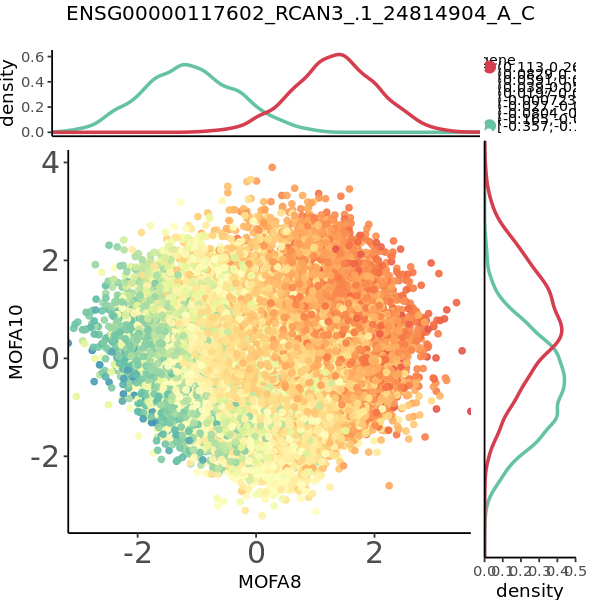

In [37]:
gene = "ENSG00000117602_RCAN3_.1_24814904_A_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA8", "MOFA10", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

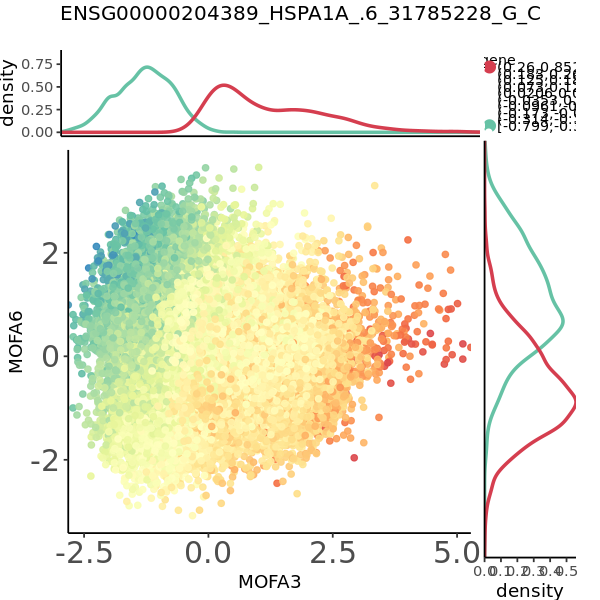

In [38]:
gene = "ENSG00000204389_HSPA1A_.6_31785228_G_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA3", "MOFA6", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

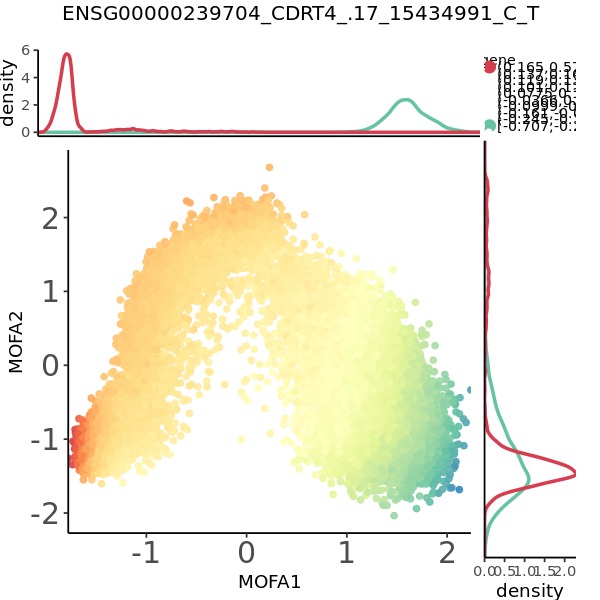

In [39]:
gene = "ENSG00000239704_CDRT4_.17_15434991_C_T"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

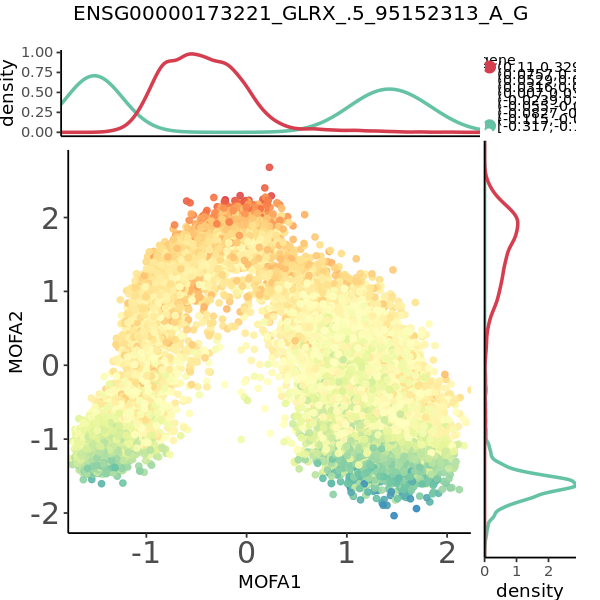

In [40]:
gene = "ENSG00000173221_GLRX_.5_95152313_A_G"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

In [41]:
################################################################
################################################################
##################### Supplementary Figure #####################
################################################################
################################################################

In [42]:
################################################################
##################### MOFA 1 only

In [43]:
colnames(df)[grep("HLA.DQB1",colnames(df))]

[1] "ENSG00000179344_HLA.DQB1_.6_32634922_A_G"

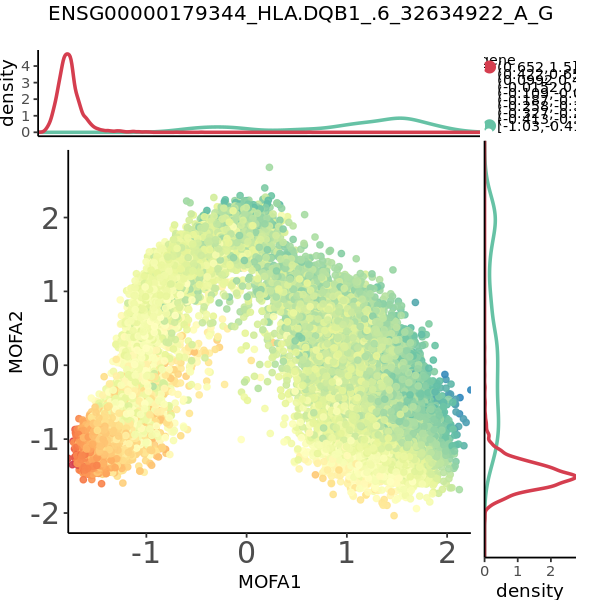

In [44]:
gene = "ENSG00000179344_HLA.DQB1_.6_32634922_A_G"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

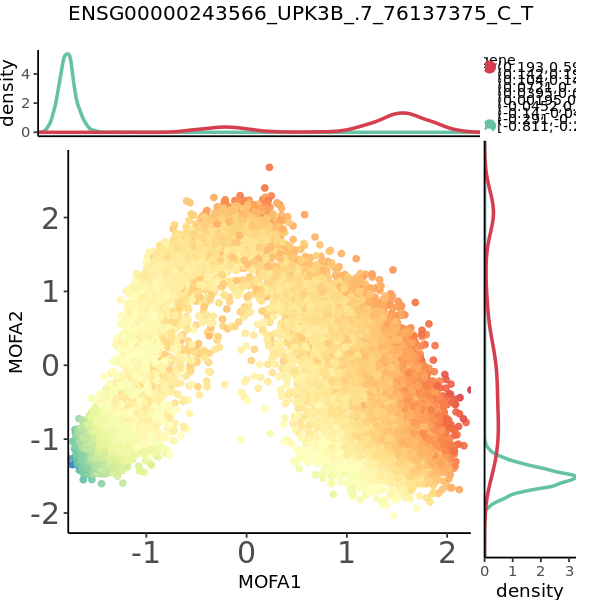

In [45]:
gene = "ENSG00000243566_UPK3B_.7_76137375_C_T"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

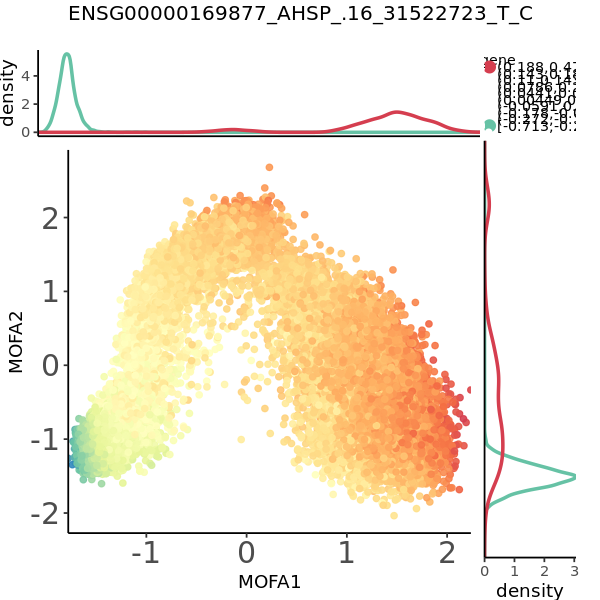

In [46]:
gene = "ENSG00000169877_AHSP_.16_31522723_T_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

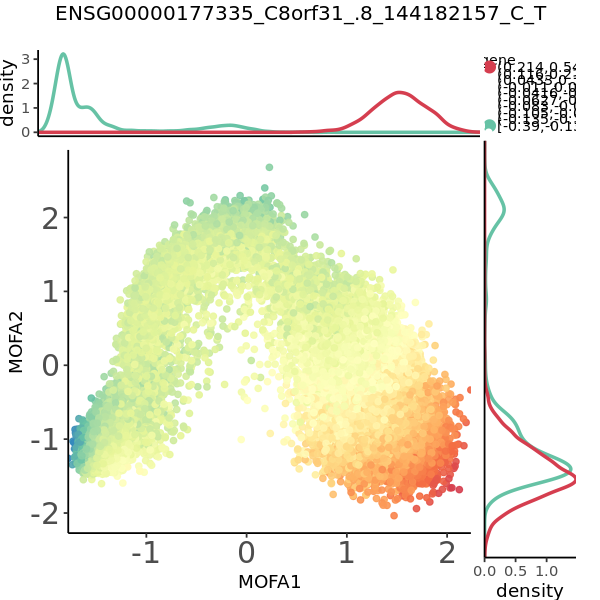

In [47]:
gene = "ENSG00000177335_C8orf31_.8_144182157_C_T"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

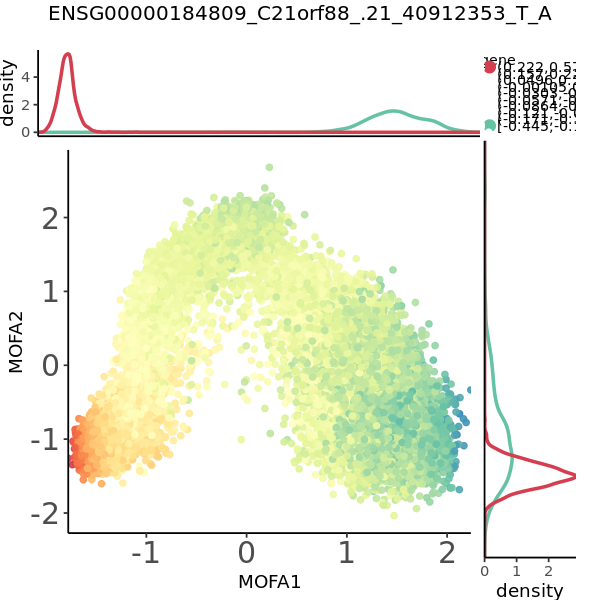

In [48]:
gene = "ENSG00000184809_C21orf88_.21_40912353_T_A"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

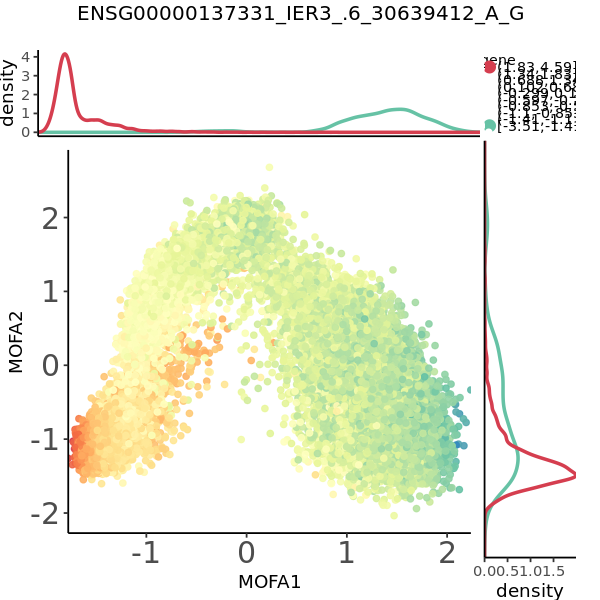

In [49]:
gene = "ENSG00000137331_IER3_.6_30639412_A_G"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

In [ ]:
################################################################
##################### MOFA 1 and 2

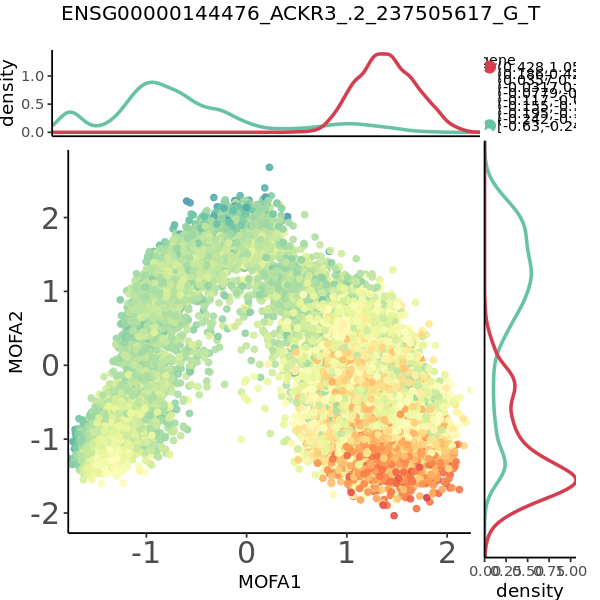

In [50]:
gene = "ENSG00000144476_ACKR3_.2_237505617_G_T"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

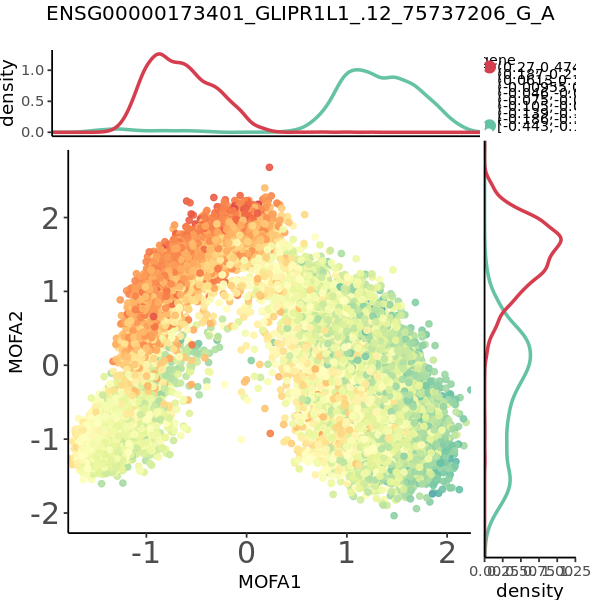

In [51]:
gene = "ENSG00000173401_GLIPR1L1_.12_75737206_G_A"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

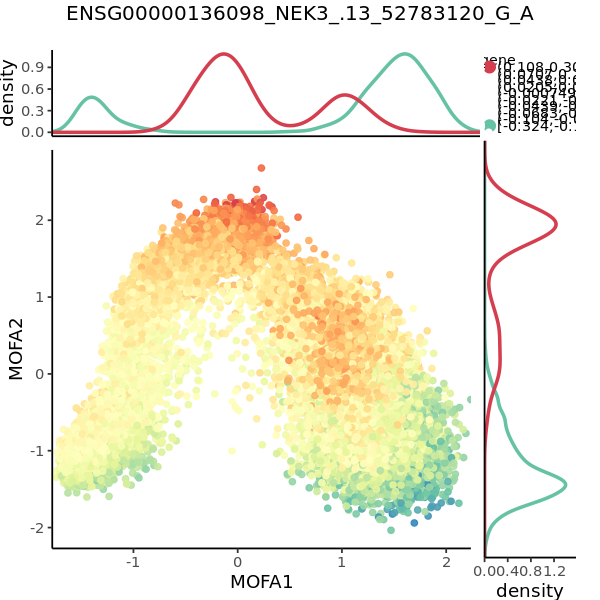

In [192]:
gene = "ENSG00000136098_NEK3_.13_52783120_G_A"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA1", "MOFA2", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

In [ ]:
################################################################
##################### MOFA 3 and 6

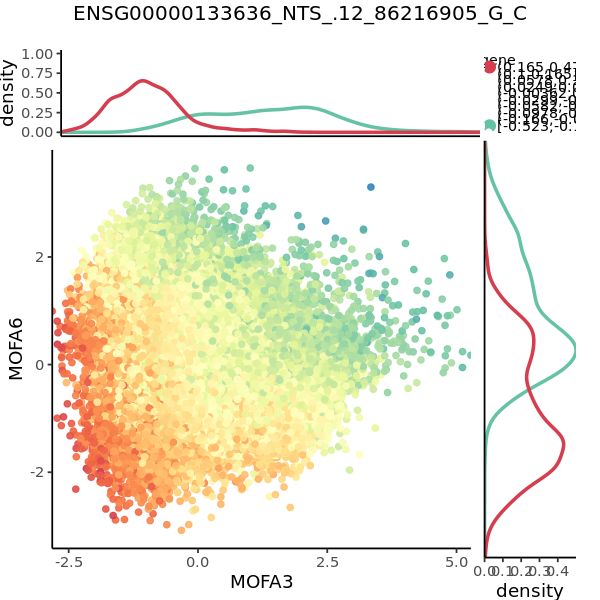

In [40]:
gene = "ENSG00000133636_NTS_.12_86216905_G_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA3", "MOFA6", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

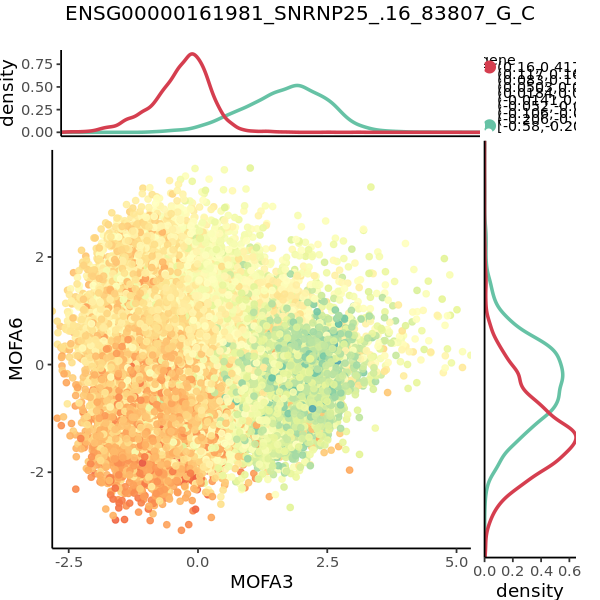

In [38]:
gene = "ENSG00000161981_SNRNP25_.16_83807_G_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA3", "MOFA6", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

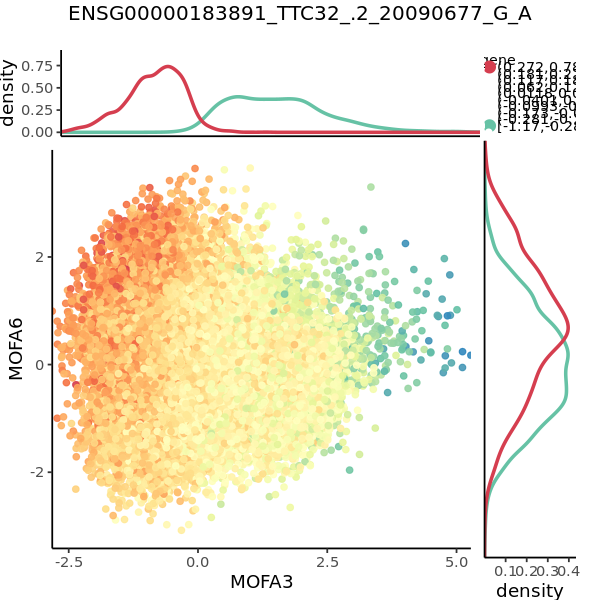

In [35]:
gene = "ENSG00000183891_TTC32_.2_20090677_G_A"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA3", "MOFA6", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

In [ ]:
################################################################
##################### MOFA 8 and 10

In [49]:
colnames(df)[grep("PRAC",colnames(df))]

[1] "ENSG00000159182_PRAC1_.17_46780476_C_G"

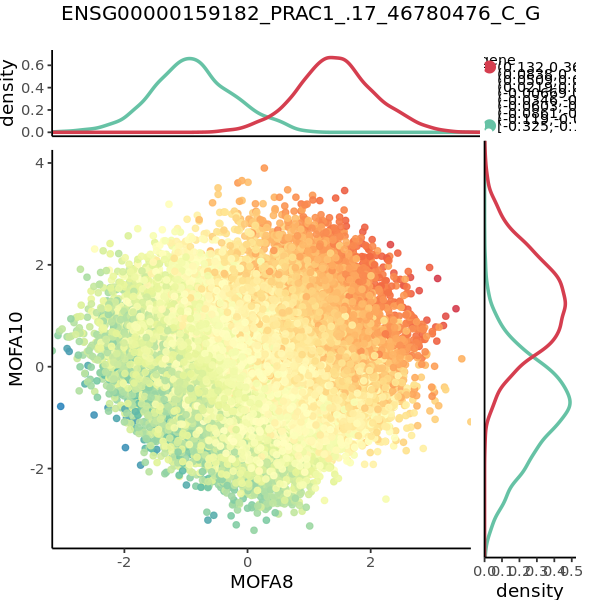

In [50]:
gene = "ENSG00000159182_PRAC1_.17_46780476_C_G"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA8", "MOFA10", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

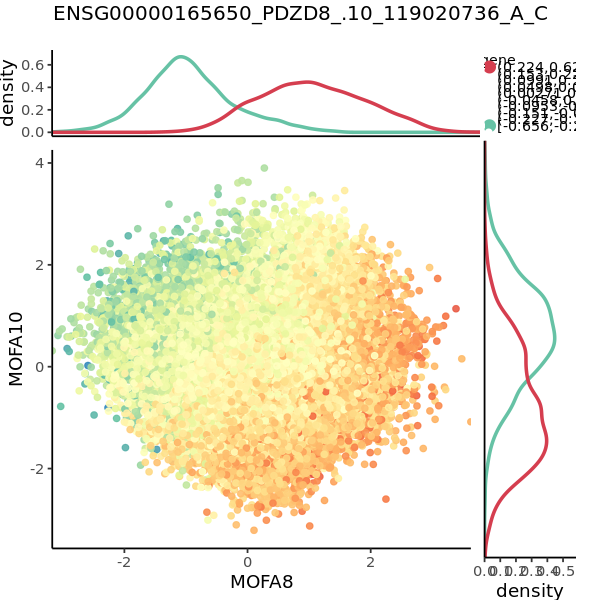

In [48]:
gene = "ENSG00000165650_PDZD8_.10_119020736_A_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA8", "MOFA10", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

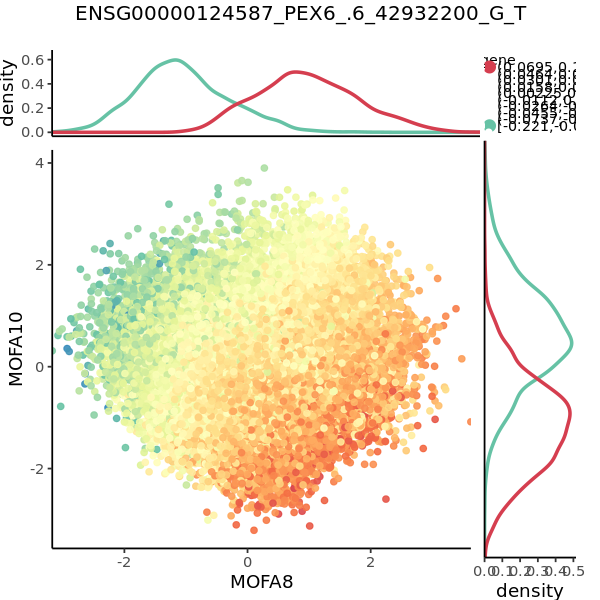

In [187]:
gene = "ENSG00000124587_PEX6_.6_42932200_G_T"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA8", "MOFA10", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

In [ ]:
################################################################
##################### MOFA 4 (and 1) - respiration

In [24]:
colnames(df)[grep("DPEP",colnames(df))]

[1] "ENSG00000141096_DPEP3_.16_68054788_A_G"

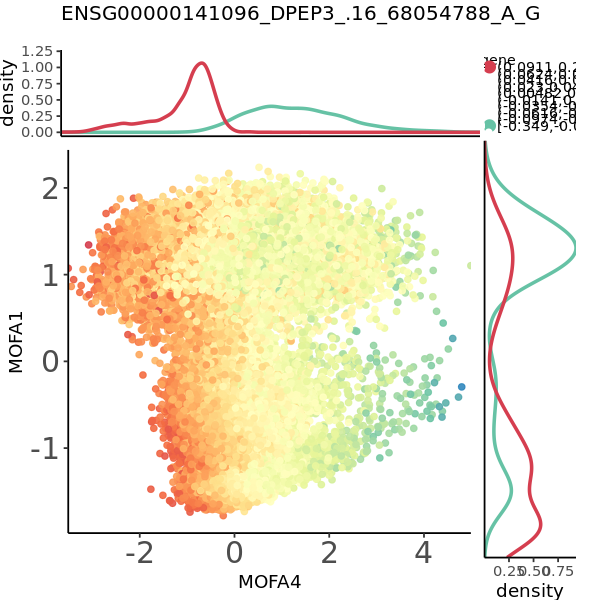

In [25]:
gene = "ENSG00000141096_DPEP3_.16_68054788_A_G"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA4", "MOFA1", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

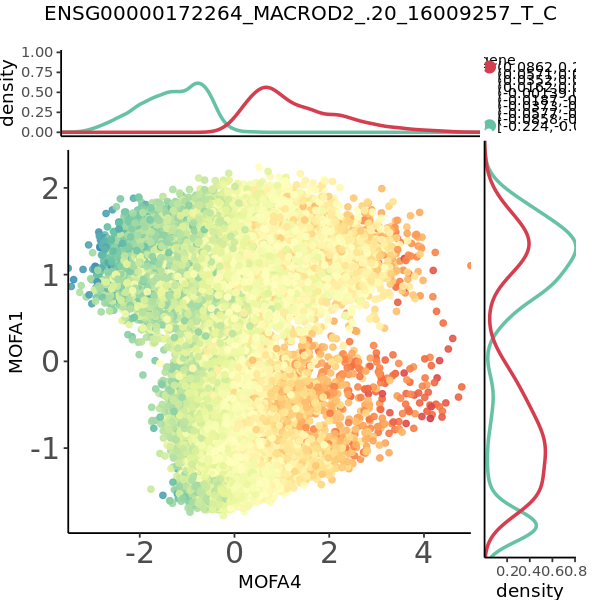

In [23]:
gene = "ENSG00000172264_MACROD2_.20_16009257_T_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA4", "MOFA1", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

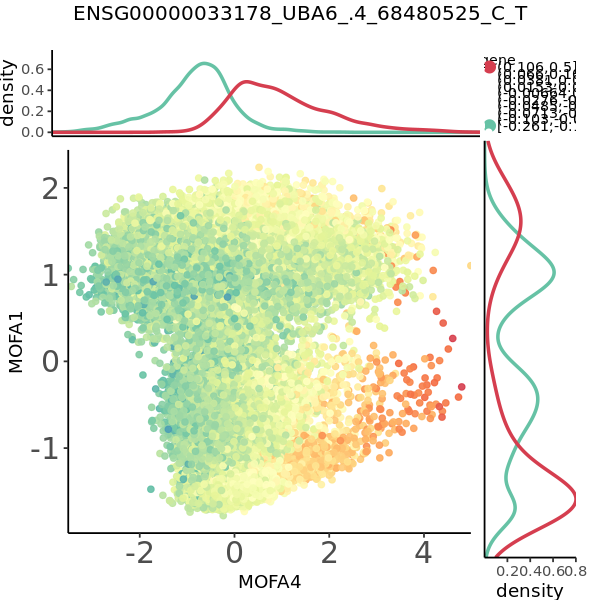

In [21]:
gene = "ENSG00000033178_UBA6_.4_68480525_C_T"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA4", "MOFA1", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

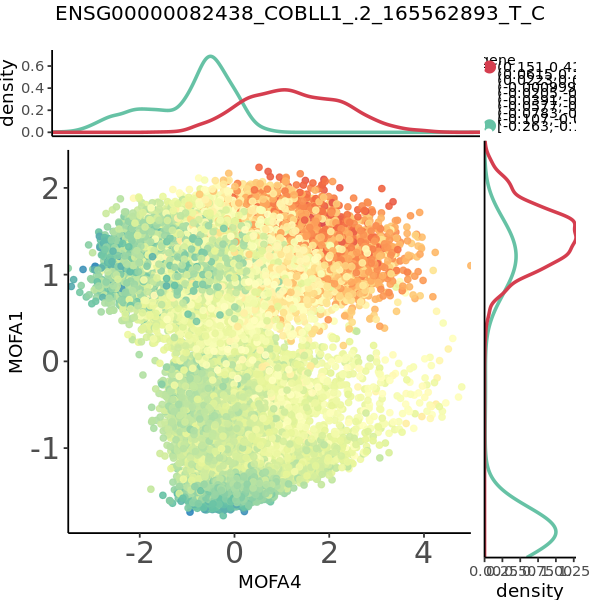

In [19]:
gene = "ENSG00000082438_COBLL1_.2_165562893_T_C"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA4", "MOFA1", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)

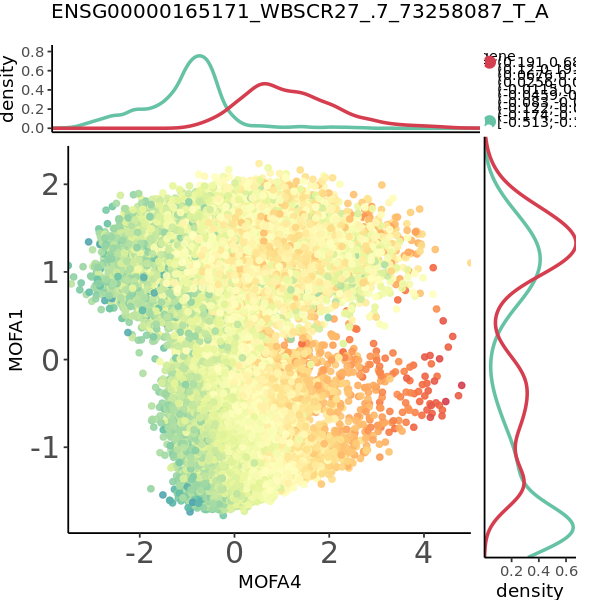

In [17]:
gene = "ENSG00000165171_WBSCR27_.7_73258087_T_A"
df0 = cbind(df_pcs, data.frame(gene = df[,gene]))
ScatterHistN(df0, "MOFA4", "MOFA1", "gene", "geneC", title = gene, nclus=10, colorPalette = cp, alpha = 0.9)